# Sadržaj

- [1. dio](#prvi_dio)
    - [<i>DataFrame</i>](#dataframe)
    - [<i>Imputer</i>](#imputer)
    - [<i>LabelEncoder</i>](#labelencoder)
    - [<i>OneHotEncoder</i>](#onehotencoder)
    - [<i>OrdinalEncoder</i>](#ordinalencoder)
    - [<i>StandardScaler</i>](#scale)
    - [<i>MinMaxScaler</i>](#scale)
    - [<i>RobustScaler</i>](#scale)
- [2. dio](#drugi_dio)
    - [<i>VarianceThreshold</i>](#variancethreshold)
    - [<i>SelectKBest</i>](#selectkbest)
    - [<i>RFECV</i>](#rfecv)
    - [<i>RandomForestClassifier</i>](#randomforestclassifier)
    - [<i>SelectFromModel</i>](#selectfrommodel)
- [3. dio](#treci_dio)
    - [<i>PCA</i>](#pca)
    - [<i>KernelPCA</i>](#pca)
    - [<i>LinearDiscriminantAnalysis</i>](#lda)
- [4. dio](#cetvrti_dio)
    - [<i>train_test_split</i>](#train_test_split)
    - [<i>resample</i>](#resample)

# 1. dio <a id="prvi_dio"></a>

## Korištenje klase <i><font color="red">DataFrame</font></i> <a id="dataframe"></a>

In [4]:
import pandas as pd
import numpy as np

<li>Nasumično cjelobrojno popunjavanje DataFrame-a brojevima iz intervala [1,100]</li>

In [5]:
df = pd.DataFrame(np.random.randint(1,101,size=(10, 4)), columns=list('ABCD'))

In [6]:
df

,A,B,C,D
0,67,35,93,91
1,62,14,56,55
2,24,66,80,14
3,77,48,6,98
4,57,28,44,23
5,92,85,9,6
6,34,52,96,32
7,98,73,32,29
8,37,76,74,48
9,3,30,92,35


<li>zamjena svih vrijednosti polja manjih od 20 ili većih od 80 s Nan</li>

In [8]:
df[['A', 'B', 'C', 'D']] = np.where(np.logical_or(df[['A', 'B', 'C', 'D']] <= 20, df[['A', 'B', 'C', 'D']] >= 80),
                                    np.NaN, df[['A', 'B', 'C', 'D']])

In [9]:
df

,A,B,C,D
0,67.0,35.0,NaN,NaN
1,62.0,NaN,56.0,55.0
2,24.0,66.0,NaN,NaN
3,77.0,48.0,NaN,NaN
4,57.0,28.0,44.0,23.0
5,NaN,NaN,NaN,NaN
6,34.0,52.0,NaN,32.0
7,NaN,73.0,32.0,29.0
8,37.0,76.0,74.0,48.0
9,NaN,30.0,NaN,35.0


<li>Broj nedostajućih vrijednosti po pojedinim stupcima</li>

In [10]:
df.isnull().sum()

A    3
B    2
C    6
D    4
dtype: int64

<li>Uklanjanje redaka (uzoraka) koji sadrže barem jednu nepoznatu vrijednost</li>

In [11]:
df.dropna(axis=0, inplace=False)

,A,B,C,D
4,57.0,28.0,44.0,23.0
8,37.0,76.0,74.0,48.0


<li>Uklanjanje uzoraka čija sva svojstva sadrže NaN</li>

In [12]:
df.dropna(how="all", inplace=False)

,A,B,C,D
0,67.0,35.0,NaN,NaN
1,62.0,NaN,56.0,55.0
2,24.0,66.0,NaN,NaN
3,77.0,48.0,NaN,NaN
4,57.0,28.0,44.0,23.0
6,34.0,52.0,NaN,32.0
7,NaN,73.0,32.0,29.0
8,37.0,76.0,74.0,48.0
9,NaN,30.0,NaN,35.0


<li>Uklanjanje redaka koji sadrže manje od 2 svojstva s poznatim vrijednostima</li>

In [13]:
df.dropna(thresh=2, inplace=False)

,A,B,C,D
0,67.0,35.0,NaN,NaN
1,62.0,NaN,56.0,55.0
2,24.0,66.0,NaN,NaN
3,77.0,48.0,NaN,NaN
4,57.0,28.0,44.0,23.0
6,34.0,52.0,NaN,32.0
7,NaN,73.0,32.0,29.0
8,37.0,76.0,74.0,48.0
9,NaN,30.0,NaN,35.0


<li>Uklanjanje uzoraka koji za određena svojstva nemaju poznate vrijednosti</li>

In [14]:
df.dropna(subset=['A','C'], inplace=False) #stupac A i/ili stupac C

,A,B,C,D
1,62.0,NaN,56.0,55.0
4,57.0,28.0,44.0,23.0
8,37.0,76.0,74.0,48.0


## Korištenje klase <i><font color="red">Imputer</font></i> <a id="imputer"></a>

In [15]:
from sklearn.preprocessing import Imputer

<li>Umetanje srednje vrijednosti stupaca na mjesta gdje se nalazi Nan</li>

In [16]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [17]:
imputer.fit(df.values)
novi_podaci = imputer.transform(df.values)
novi_frame = pd.DataFrame(novi_podaci, columns=list('ABCD'))
novi_frame.round(2)

,A,B,C,D
0,67.00,35.0,51.5,37.0
1,62.00,51.0,56.0,55.0
2,24.00,66.0,51.5,37.0
3,77.00,48.0,51.5,37.0
4,57.00,28.0,44.0,23.0
5,51.14,51.0,51.5,37.0
6,34.00,52.0,51.5,32.0
7,51.14,73.0,32.0,29.0
8,37.00,76.0,74.0,48.0
9,51.14,30.0,51.5,35.0


## Korištenje klase <i><font color="red">LabelEncoder</font></i> <a id="labelencoder"></a>

In [18]:
from matplotlib import colors
df1 = df.assign(**{'E':list(colors.cnames.keys())[:10]})
df1

,A,B,C,D,E
0,67.0,35.0,NaN,NaN,aliceblue
1,62.0,NaN,56.0,55.0,antiquewhite
2,24.0,66.0,NaN,NaN,aqua
3,77.0,48.0,NaN,NaN,aquamarine
4,57.0,28.0,44.0,23.0,azure
5,NaN,NaN,NaN,NaN,beige
6,34.0,52.0,NaN,32.0,bisque
7,NaN,73.0,32.0,29.0,black
8,37.0,76.0,74.0,48.0,blanchedalmond
9,NaN,30.0,NaN,35.0,blue


In [19]:
from sklearn.preprocessing import LabelEncoder

<li>Definiranje svojstva za koje želimo transformaciju</li>

In [20]:
le = LabelEncoder()
df1['E'] = le.fit_transform(df1['E'].values)

In [21]:
df1

,A,B,C,D,E
0,67.0,35.0,NaN,NaN,0
1,62.0,NaN,56.0,55.0,1
2,24.0,66.0,NaN,NaN,2
3,77.0,48.0,NaN,NaN,3
4,57.0,28.0,44.0,23.0,4
5,NaN,NaN,NaN,NaN,5
6,34.0,52.0,NaN,32.0,6
7,NaN,73.0,32.0,29.0,7
8,37.0,76.0,74.0,48.0,8
9,NaN,30.0,NaN,35.0,9


## Korištenje klase <i><font color="red">OneHotEncoder</font></i> <a id="onehotencoder"></a>

In [22]:
df1

,A,B,C,D,E
0,67.0,35.0,NaN,NaN,0
1,62.0,NaN,56.0,55.0,1
2,24.0,66.0,NaN,NaN,2
3,77.0,48.0,NaN,NaN,3
4,57.0,28.0,44.0,23.0,4
5,NaN,NaN,NaN,NaN,5
6,34.0,52.0,NaN,32.0,6
7,NaN,73.0,32.0,29.0,7
8,37.0,76.0,74.0,48.0,8
9,NaN,30.0,NaN,35.0,9


In [23]:
from sklearn.preprocessing import OneHotEncoder

<li>Definiranje stupaca za koje želimo provesti transformaciju</li>

In [24]:
ohe = OneHotEncoder(categorical_features=[4], sparse=False)

In [25]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
df1 = pd.DataFrame(imputer.fit_transform(df1.values), columns=list('ABCDE'))
novi_podaci = ohe.fit_transform(df1.values)

In [26]:
df2 = pd.DataFrame(novi_podaci)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.000000,35.0,51.5,37.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.000000,51.0,56.0,55.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.000000,66.0,51.5,37.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77.000000,48.0,51.5,37.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,57.000000,28.0,44.0,23.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,51.142857,51.0,51.5,37.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,34.000000,52.0,51.5,32.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,51.142857,73.0,32.0,29.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.000000,76.0,74.0,48.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,51.142857,30.0,51.5,35.0


## Korištenje klase <i><font color="red">OrdinalEncoder</font></i> <a id="ordinalencoder"></a>

Klasa trenutno nije dostupna u zadnjoj verziji paketa, ali moguće je ordinalna svojstva transformirati pomoću rječnika

In [27]:
mali_df = df.assign(**{'E':['XL', 'M', 'L', 'M', 'XL', 'S', 'M', 'XXL', 'L', 'L']})
mali_df

,A,B,C,D,E
0,67.0,35.0,NaN,NaN,XL
1,62.0,NaN,56.0,55.0,M
2,24.0,66.0,NaN,NaN,L
3,77.0,48.0,NaN,NaN,M
4,57.0,28.0,44.0,23.0,XL
5,NaN,NaN,NaN,NaN,S
6,34.0,52.0,NaN,32.0,M
7,NaN,73.0,32.0,29.0,XXL
8,37.0,76.0,74.0,48.0,L
9,NaN,30.0,NaN,35.0,L


In [28]:
rjecnik_mapiranja = {'S':1, 'M':2, 'L':3, 'XL':4, 'XXL':5, '3XL':6}

In [29]:
mali_df['E'] = mali_df['E'].map(rjecnik_mapiranja)
mali_df

,A,B,C,D,E
0,67.0,35.0,NaN,NaN,4
1,62.0,NaN,56.0,55.0,2
2,24.0,66.0,NaN,NaN,3
3,77.0,48.0,NaN,NaN,2
4,57.0,28.0,44.0,23.0,4
5,NaN,NaN,NaN,NaN,1
6,34.0,52.0,NaN,32.0,2
7,NaN,73.0,32.0,29.0,5
8,37.0,76.0,74.0,48.0,3
9,NaN,30.0,NaN,35.0,3


## Korištenje klasa <i><font color="red">StandardScaler</font></i>, <i><font color="red">MinMaxScaler</font></i> i <i><font color="red">RobustScaler</font></i> <a id="scale"></a>

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [31]:
stdsc = StandardScaler()
mmsc = MinMaxScaler()
rbtsc = RobustScaler()

In [32]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
novi_df = pd.DataFrame(imputer.fit_transform(mali_df.values), columns=list('ABCDE'))
mali_df_std = stdsc.fit_transform(novi_df.values)
mali_df_mm = mmsc.fit_transform(novi_df.values)
mali_df_rbt = rbtsc.fit_transform(novi_df.values)

In [33]:
pd.DataFrame(mali_df_std, columns=list('ABCDE'))

,A,B,C,D,E
0,1.044940,-0.998053,0.000000,0.000000,0.968496
1,0.715455,0.000000,0.458563,2.100992,-0.792406
2,-1.788636,0.935674,0.000000,0.000000,0.088045
3,1.703912,-0.187135,0.000000,0.000000,-0.792406
4,0.385969,-1.434701,-0.764272,-1.634105,0.968496
5,0.000000,0.000000,0.000000,0.000000,-1.672857
6,-1.129665,0.062378,0.000000,-0.583609,-0.792406
7,0.000000,1.372322,-1.987108,-0.933774,1.848947
8,-0.931974,1.559457,2.292817,1.283940,0.088045
9,0.000000,-1.309944,0.000000,-0.233444,0.088045


In [34]:
pd.DataFrame(mali_df_mm, columns=list('ABCDE'))

,A,B,C,D,E
0,0.811321,0.145833,0.464286,0.43750,0.75
1,0.716981,0.479167,0.571429,1.00000,0.25
2,0.000000,0.791667,0.464286,0.43750,0.50
3,1.000000,0.416667,0.464286,0.43750,0.25
4,0.622642,0.000000,0.285714,0.00000,0.75
5,0.512129,0.479167,0.464286,0.43750,0.00
6,0.188679,0.500000,0.464286,0.28125,0.25
7,0.512129,0.937500,0.000000,0.18750,1.00
8,0.245283,1.000000,1.000000,0.78125,0.50
9,0.512129,0.041667,0.464286,0.37500,0.50


In [35]:
pd.DataFrame(mali_df_rbt, columns=list('ABCDE'))

,A,B,C,D,E
0,0.784452,-0.659794,0.0,0.000000,0.571429
1,0.537102,0.000000,4.5,4.235294,-0.571429
2,-1.342756,0.618557,0.0,0.000000,0.000000
3,1.279152,-0.123711,0.0,0.000000,-0.571429
4,0.289753,-0.948454,-7.5,-3.294118,0.571429
5,0.000000,0.000000,0.0,0.000000,-1.142857
6,-0.848057,0.041237,0.0,-1.176471,-0.571429
7,0.000000,0.907216,-19.5,-1.882353,1.142857
8,-0.699647,1.030928,22.5,2.588235,0.000000
9,0.000000,-0.865979,0.0,-0.470588,0.000000


# 2. dio <a id="drugi_dio"></a>

## Korištenje klase <i><font color="red">VarianceThreshold</font></i> <a id="variancethreshold"></a>

In [36]:
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

In [37]:
iris_podaci = datasets.load_iris()

In [38]:
podaci = iris_podaci.data
oznake = iris_podaci.target
podaci[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

<li>Pregled varijanci pojedinih svojstava</li>

In [39]:
vthreshold = VarianceThreshold(threshold=0.55)
vthreshold.fit(podaci)

VarianceThreshold(threshold=0.55)

In [40]:
threshold_df = pd.DataFrame(vthreshold.variances_.reshape(1,4), columns=iris_podaci.feature_names).rename(index={0:'Varijanca'})
threshold_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Varijanca,0.681122,0.186751,3.092425,0.578532


In [41]:
iris_novi_podaci = vthreshold.transform(podaci)
iris_novi_podaci[:10]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1]])

## Korištenje klase <i><font color="red">SelectKBest</font></i> <a id="selectkbest"></a>

In [42]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

<li>Odabir samo k svojstava koja postižu najbolje rezultate univarijantnih statističkih testova</li>

In [43]:
selectkb = SelectKBest(chi2, k=2)
iris_novi_podaci = selectkb.fit_transform(podaci, oznake)
selectkb.scores_

array([ 10.81782088,   3.59449902, 116.16984746,  67.24482759])

In [44]:
iris_novi_podaci[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [45]:
selectkb = SelectKBest(f_classif, k=2)
iris_novi_podaci = selectkb.fit_transform(podaci, oznake)
selectkb.scores_

array([ 119.26450218,   47.3644614 , 1179.0343277 ,  959.32440573])

In [46]:
iris_novi_podaci[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [47]:
selectkb = SelectKBest(mutual_info_classif, k=2)
iris_novi_podaci = selectkb.fit_transform(podaci, oznake)
selectkb.scores_

array([0.50292907, 0.25926183, 0.99258378, 0.99585261])

In [48]:
iris_novi_podaci[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

## Korištenje klase <i><font color="red">RFECV</font></i> <a id="rfecv"></a>

In [49]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn import datasets

<li>Korištenje metode potpornih vektora za unakrsnu validaciju</li>

In [50]:
svm = SVC(kernel='linear')

In [51]:
podaci_rak = datasets.load_breast_cancer()
podaci, oznake = podaci_rak.data, podaci_rak.target

In [52]:
podaci.shape

(569, 30)

In [53]:
rfecv = RFECV(svm, cv=10).fit(podaci, oznake)

In [54]:
print(rfecv.support_)

[ True False  True False  True  True  True  True  True False False  True
  True False False  True  True False False False  True  True False False
  True  True  True  True  True  True]


In [55]:
print(rfecv.ranking_)

[ 1  3  1 12  1  1  1  1  1  9  7  1  1  4  5  1  1  2 10  8  1  1  6 11
  1  1  1  1  1  1]


In [56]:
rfecv.n_features_

19

In [58]:
import matplotlib.pyplot as plt

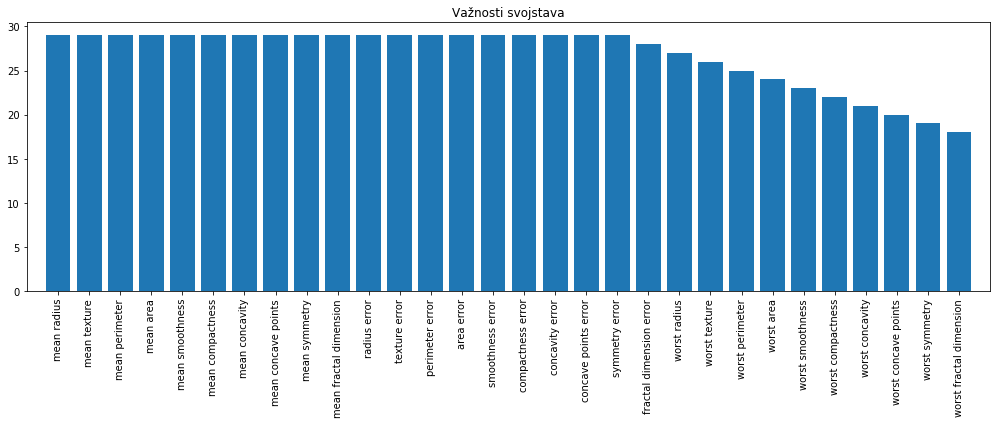

In [63]:
vaznosti = podaci.shape[1] - rfecv.ranking_
ssort_indeks = np.argsort(vaznosti)[::-1]
plt.figure(figsize=(14,6))
plt.bar(range(podaci.shape[1]), vaznosti[ssort_indeks], align='center')
plt.xticks(range(podaci.shape[1]), podaci_rak.feature_names, rotation=90)
plt.xlim([-1, podaci.shape[1]])
plt.title("Važnosti svojstava")
plt.tight_layout()
plt.show()

## Korištenje klase <i><font color="red">RandomForestClassifier</font></i> <a id="randomforestclassifier"></a>

In [65]:
from sklearn.ensemble import RandomForestClassifier

<li>Korištenje slučajne šume s 1000 stabala</li>

In [66]:
rfc = RandomForestClassifier(n_estimators=1000, random_state=1).fit(podaci, oznake)

In [67]:
vaznosti = rfc.feature_importances_

In [68]:
ssort_indeks = np.argsort(vaznosti)[::-1]

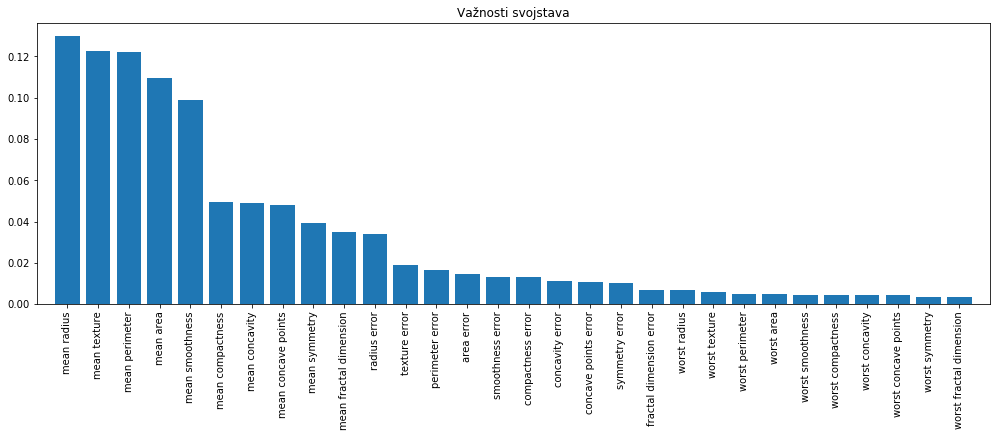

In [69]:
plt.figure(figsize=(14,6))
plt.bar(range(podaci.shape[1]), vaznosti[ssort_indeks], align='center')
plt.xticks(range(podaci.shape[1]), podaci_rak.feature_names, rotation=90)
plt.xlim([-1, podaci.shape[1]])
plt.tight_layout()
plt.title("Važnosti svojstava")
plt.show()

## Korištenje klase <i><font color="red">SelectFromModel</font></i> <a id="selectfrommodel"></a>

In [70]:
podaci, oznake = datasets.make_classification(n_samples=1000, n_features=50, n_informative=20, n_redundant=5,
                                              n_clusters_per_class=4, flip_y=0.4)

In [71]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, RidgeCV

In [72]:
clf = LassoCV()

In [73]:
sfm = SelectFromModel(clf)
novi_podaci = sfm.fit_transform(podaci, oznake)

In [74]:
podaci.shape, novi_podaci.shape

((1000, 50), (1000, 16))

In [75]:
clf = RidgeCV()

In [76]:
sfm = SelectFromModel(clf)
novi_podaci = sfm.fit_transform(podaci, oznake)

In [77]:
podaci.shape, novi_podaci.shape

((1000, 50), (1000, 19))

# 3.dio <a id="treci_dio"></a>

## Korištenje klasa <i><font color="red">PCA</font></i> i <i><font color="red">KernelPCA</font></i> <a id="pca"></a>

In [78]:
podaci_pca = datasets.load_digits()
podaci, oznake = podaci_pca.data, podaci_pca.target
podaci.shape

(1797, 64)

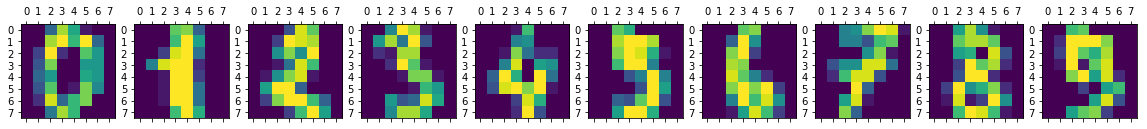

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20,10))
for i in range(10):
    ax[i].matshow(podaci_pca.images[i])
plt.show()

In [83]:
from sklearn.decomposition import PCA, KernelPCA

<li>Analiza važnosti pojedinih svojstvenih vektora</li>

In [84]:
pca1 = PCA()

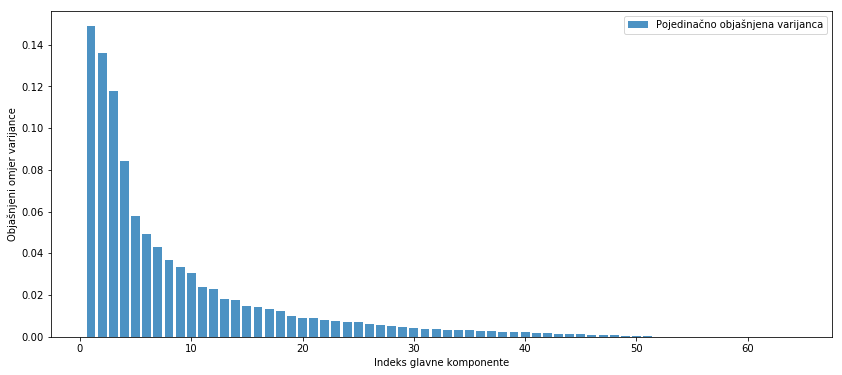

In [85]:
pca1.fit(podaci, oznake)
plt.figure(figsize=(14,6))
plt.bar(range(1,65), pca1.explained_variance_ratio_, alpha=0.8, align='center', label='Pojedinačno objašnjena varijanca')
plt.ylabel('Objašnjeni omjer varijance')
plt.xlabel('Indeks glavne komponente')
plt.legend(loc='best')
plt.show()

<li>Smanjenje dimenzije podataka na svega 3 dimenzije</li>

In [86]:
podaci_pca = PCA(n_components=3).fit_transform(podaci)

In [87]:
boje = ['red', 'blue', 'green', 'yellow', 'black', 'cyan', 'darkblue', 'orange', 'cornsilk', 'sienna']

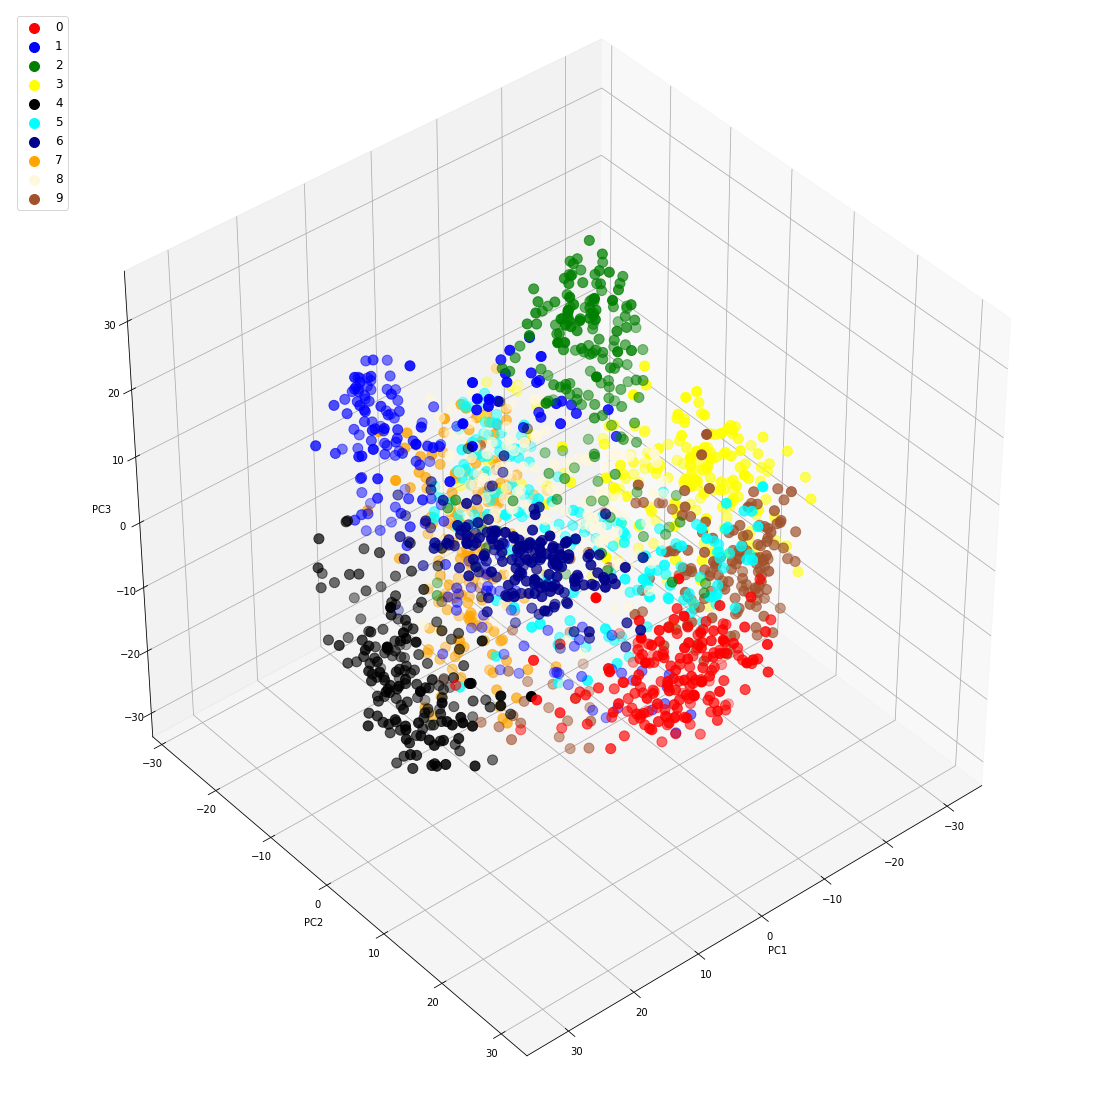

In [88]:
def prikaz3d(podaci, oznake, labele):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(15,15))
    ax = Axes3D(fig)
    for oznaka, boja in zip(np.unique(oznake), boje):
        ax.scatter(podaci[oznake==oznaka, 0], podaci[oznake==oznaka, 1], podaci[oznake==oznaka, 2],
                   c=boja, label=oznaka, marker='o', s=100)
    ax.set_xlabel(labele[0])
    ax.set_ylabel(labele[1])
    ax.set_zlabel(labele[2])
    plt.legend(loc='upper left', prop={'size': 12})
    ax.view_init(40, 50)
    plt.show()
prikaz3d(podaci_pca, oznake, ('PC1', 'PC2', 'PC3'))

In [89]:
podaci, oznake = datasets.make_circles(n_samples=1000, noise=0.1, factor=0.2)

In [90]:
podaci_kernelpca = KernelPCA(kernel='rbf', gamma=15, n_components=2).fit_transform(podaci)
podaci_kernelpca.shape

(1000, 2)

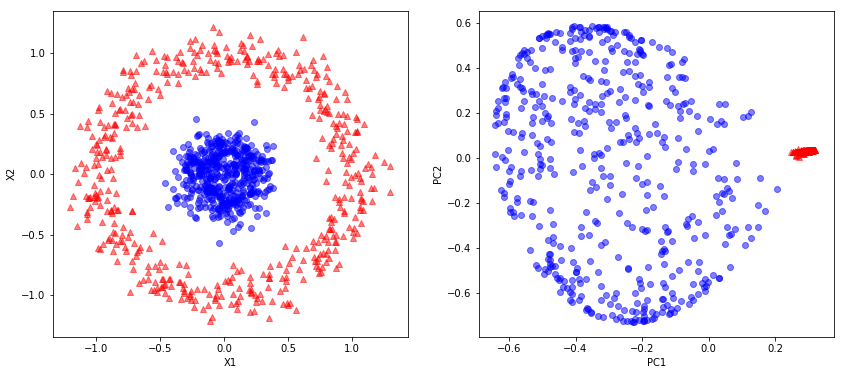

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax[0].scatter(podaci[oznake==0, 0], podaci[oznake==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(podaci[oznake==1, 0], podaci[oznake==1, 1], color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[1].scatter(podaci_kernelpca[oznake==0, 0], podaci_kernelpca[oznake==0, 1], color='red', marker='^', alpha=0.5)
ax[1].scatter(podaci_kernelpca[oznake==1, 0], podaci_kernelpca[oznake==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
plt.show()

## Korištenje klase <i><font color="red">LinearDiscriminantAnalysis</font></i> <a id="lda"></a>

In [92]:
podaci_lda = datasets.load_wine()
podaci, oznake = podaci_lda.data, podaci_lda.target

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [94]:
lda = LDA()

In [95]:
podaci_lda = lda.fit_transform(podaci, oznake)
podaci_lda.shape

(178, 2)

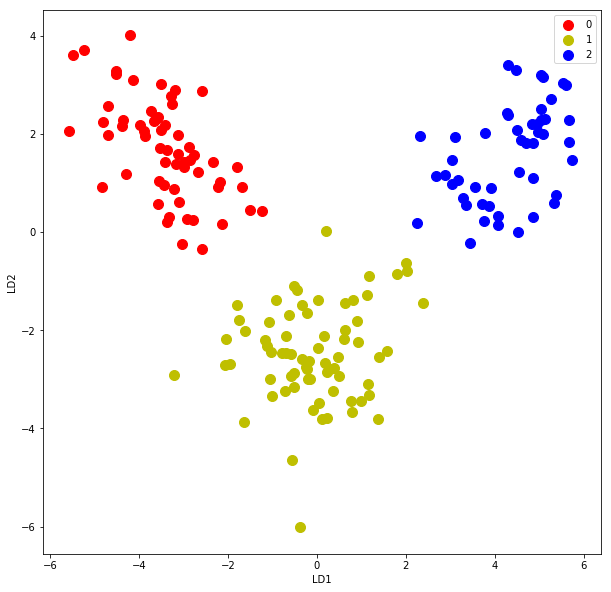

In [96]:
plt.figure(figsize=(10,10))
for oznaka, boja in zip(np.unique(oznake), ['r', 'y', 'b']):
    plt.scatter(podaci_lda[oznake==oznaka, 0], podaci_lda[oznake==oznaka, 1], c=boja, label=oznaka, marker='o', s=100)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best')
plt.show()

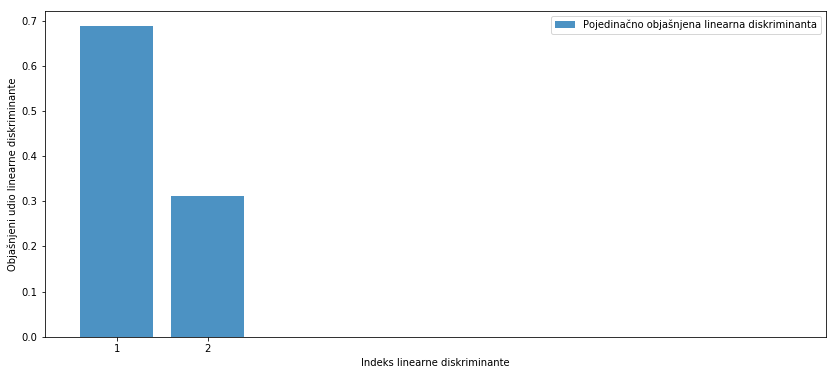

In [185]:
plt.figure(figsize=(14,6))
plt.bar(range(1,9), np.concatenate((lda.explained_variance_ratio_, np.zeros(6))), alpha=0.8, align='center',
        label='Pojedinačno objašnjena linearna diskriminanta')
plt.ylabel('Objašnjeni udio linearne diskriminante')
plt.xlabel('Indeks linearne diskriminante')
plt.xticks((1,2),(1,2))
plt.legend(loc='best')
plt.show()

# 4.dio <a id="cetvrti_dio"></a>

## Korištenje funkcije <i><font color="red">train_test_split</font></i> <a id="train_test_split"></a>

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
podaci_vino = datasets.load_wine()
podaci, oznake = podaci_vino.data, podaci_vino.target

<li>Podijela podataka na 80% za treniranje i 20% za testiranje</li>

In [191]:
podaci_tren, podaci_test, oznake_tren, oznake_test = train_test_split(podaci, oznake, test_size=0.2,
                                                                      stratify=oznake, random_state=1)

In [192]:
podaci_tren.shape, podaci_test.shape

((142, 13), (36, 13))

In [198]:
100 * np.round(podaci_tren.shape[0]/podaci.shape[0], 2), 100 * np.round(podaci_test.shape[0]/podaci.shape[0], 2)

(80.0, 20.0)

## Korištenje funkcije <i><font color="red">resample</font></i> <a id="resample"></a>

In [199]:
from sklearn.utils import resample

In [200]:
podaci_iris = datasets.load_iris()
podaci, oznake = podaci_iris.data[:75], podaci_iris.target[:75]

In [203]:
podaci[oznake == 0].shape[0], podaci[oznake == 1].shape[0]

(50, 25)

<li>Provođenje naduzorkovanja klase 1 do 50 uzoraka</li>

In [204]:
podaci_novo, oznake_novo = resample(podaci[oznake == 1], oznake[oznake == 1], replace=True,
                                   n_samples=podaci[oznake == 0].shape[0], random_state=1)

In [207]:
podaci_novo.shape[0]

50

In [209]:
podaci = np.vstack((podaci[oznake == 0], podaci_novo))
oznake = np.hstack((oznake[oznake == 0], oznake_novo))

In [211]:
podaci[oznake == 0].shape[0], podaci[oznake == 1].shape[0]

(50, 50)